# Implementing Apriori algorithm from mlxtend#

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
groceries = [] #Groceries named list is created
with open("groceries.csv") as f: #so groceries file is read as f
    groceries = f.read()

Here, groceries csv is read with new way because, if we read the file with pandas, it will create its dataFrame, as we don't need it.


We have a grocery file in which, there are columns that are items, so if there is a customer, that customer is not going to buy every product so that, which item is not purchased, will be written as NaN.


So, we are going to have so many NaN values, so that list format should be converted to Binary Matrix Format having 1's and 0's.

So, Dimensions of the data (columns) is going to increase in Binary Matrix Format.

In [3]:
groceries

'citrus fruit,semi-finished bread,margarine,ready soups\ntropical fruit,yogurt,coffee\nwhole milk\npip fruit,yogurt,cream cheese ,meat spreads\nother vegetables,whole milk,condensed milk,long life bakery product\nwhole milk,butter,yogurt,rice,abrasive cleaner\nrolls/buns\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)\npot plants\nwhole milk,cereals\ntropical fruit,other vegetables,white bread,bottled water,chocolate\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes\nbeef\nfrankfurter,rolls/buns,soda\nchicken,tropical fruit\nbutter,sugar,fruit/vegetable juice,newspapers\nfruit/vegetable juice\npackaged fruit/vegetables\nchocolate\nspecialty bar\nother vegetables\nbutter milk,pastry\nwhole milk\ntropical fruit,cream cheese ,processed cheese,detergent,newspapers\ntropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,salty snack,waffles,candy,bathroom cleaner\nbottled water,canned beer\nyogur

#Getting information using pandas#

In [4]:
gdata = pd.read_csv("groceries.csv", on_bad_lines='skip')

In [5]:
gdata.head()

citrus fruit semi-finished bread       margarine  \
0    tropical fruit              yogurt          coffee   
1        whole milk                 NaN             NaN   
2         pip fruit              yogurt   cream cheese    
3  other vegetables          whole milk  condensed milk   
4        rolls/buns                 NaN             NaN   

                ready soups  
0                       NaN  
1                       NaN  
2              meat spreads  
3  long life bakery product  
4                       NaN

In [6]:
gdata.shape

(6105, 4)

In [7]:
gdata.describe()

citrus fruit semi-finished bread margarine    ready soups
count          6105                3946      2303           1004
unique          158                 149       141            111
top      whole milk          rolls/buns      soda  shopping bags
freq            525                 307       166            112

In [8]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6105 entries, 0 to 6104
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   citrus fruit         6105 non-null   object
 1   semi-finished bread  3946 non-null   object
 2   margarine            2303 non-null   object
 3   ready soups          1004 non-null   object
dtypes: object(4)
memory usage: 190.9+ KB


In [9]:
gdata.isnull()

citrus fruit  semi-finished bread  margarine  ready soups
0            False                False      False         True
1            False                 True       True         True
2            False                False      False        False
3            False                False      False        False
4            False                 True       True         True
...            ...                  ...        ...          ...
6100         False                False       True         True
6101         False                False      False         True
6102         False                False      False        False
6103         False                 True       True         True
6104         False                False      False        False

[6105 rows x 4 columns]

# Splitting the data into separate transactions using separator as "\n" 

In [10]:
groceries = groceries.split("\n") # Data is splitted by \n i.e. with new line
                                  # and assigned to groceries.

In [11]:
groceries # The data will be in textual format

['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes',
 'beef',
 'frankfurter,rolls/buns,soda',
 'chicken,tropical fruit',
 'butter,sugar,fruit/vegetable juice,newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk,pastry',
 'whole milk',
 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers',
 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,sal

In [12]:
groceries_list = []     # groceries_list named list is created
for i in groceries:     # with for loop, every datapoint is going to append.
    groceries_list.append(i.split(","))   # groceries_list is appended with list splitted by comma ,

In [13]:
groceries_list # Here in groceries_list List, there are some lists are present.

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

# Elemantary Analysis #

In [14]:
all_groceries_list = [i for item in groceries_list for i in item]
            # here loop in loop is run, i.e. every item in grocery list, and for every item in list which is present in groceries_list
            # These data is appended in all_grocery_list

In [15]:
all_groceries_list # so, here every item is separated and appended in all_groceries_list

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt',
 'cream cheese ',
 'meat spreads',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 'pot plants',
 'whole milk',
 'cereals',
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 'citrus fruit',
 'tropical fruit',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'flour',
 'bottled water',
 'dishes',
 'beef',
 'frankfurter',
 'rolls/buns',
 'soda',
 'chicken',
 'tropical fruit',
 'butter',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'pastry',
 'whole milk',
 'tropical fru

#Getting unique frequencies#

In [16]:
from collections import Counter # So, Counter counts the unique item with its frequency
item_frequencies = Counter(all_groceries_list) # so, all_groceries_list is passed to Counter and that data is stored in item_frequencies

In [17]:
item_frequencies

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
   

In [18]:
item_frequencies # This is the list with it's frequency.

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
   

So, here the binary matrix for the list will be created. i.e. 0 0 0 0 1 0 0 1 1 i.e. 0 for not bought and 1 for bought .... This is will be created for all items with binary matrix format

# sorting#

In [19]:
item_frequencies = sorted(item_frequencies.items(), key = lambda x: x[1])
# So, tuple is created, by sorting the item_frequencies by items using lambda function

In [20]:
item_frequencies

[('baby food', 1),
 ('sound storage medium', 1),
 ('', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8),
 ('salad dressing', 8),
 ('whisky', 8),
 ('liqueur', 9),
 ('rubbing alcohol', 10),
 ('hair spray', 11),
 ('frozen fruits', 12),
 ('cream', 13),
 ('honey', 15),
 ('decalcifier', 15),
 ('organic products', 16),
 ('specialty vegetables', 17),
 ('ready soups', 18),
 ('flower soil/fertilizer', 19),
 ('prosecco', 20),
 ('cocoa drinks', 22),
 ('organic sausage', 22),
 ('pudding powder', 23),
 ('tidbits', 23),
 ('cooking chocolate', 25),
 ('soap', 26),
 ('bathroom cleaner', 27),
 ('cookware', 27),
 ('potato products', 28),
 ('fish', 29),
 ('snack products', 30),
 ('nut snack', 31),
 ('artif. sweetener', 32),
 ('canned fruit', 32),
 ('syrup', 32),
 ('nuts/prunes', 33),
 ('abrasive cleaner', 35),
 ('skin care', 35),
 ('specialty fat', 36),
 ('tea', 38),
 ('brandy', 41),
 ('

# Storing frequencies and items in separate variables #


In [21]:
frequencies = list(reversed([i[1] for i in item_frequencies])) # so, the item_frequencies are separated with frequency in ascending order
items = list(reversed([i[0] for i in item_frequencies])) # Same for items.

In [22]:
frequencies

[2513,
 1903,
 1809,
 1715,
 1372,
 1087,
 1072,
 1032,
 969,
 924,
 875,
 814,
 792,
 785,
 764,
 744,
 711,
 705,
 638,
 624,
 580,
 576,
 571,
 567,
 545,
 524,
 516,
 515,
 488,
 473,
 422,
 414,
 390,
 378,
 372,
 368,
 365,
 333,
 329,
 327,
 327,
 324,
 305,
 299,
 294,
 279,
 279,
 276,
 275,
 269,
 256,
 256,
 254,
 246,
 241,
 241,
 229,
 220,
 207,
 189,
 189,
 187,
 176,
 174,
 174,
 173,
 171,
 170,
 168,
 163,
 160,
 148,
 148,
 140,
 130,
 128,
 118,
 115,
 112,
 110,
 109,
 106,
 106,
 106,
 103,
 102,
 101,
 101,
 93,
 91,
 90,
 89,
 89,
 88,
 84,
 84,
 83,
 82,
 80,
 79,
 78,
 75,
 73,
 71,
 68,
 67,
 64,
 64,
 60,
 59,
 57,
 56,
 55,
 54,
 54,
 53,
 51,
 50,
 50,
 50,
 45,
 44,
 42,
 42,
 41,
 41,
 38,
 36,
 35,
 35,
 33,
 32,
 32,
 32,
 31,
 30,
 29,
 28,
 27,
 27,
 26,
 25,
 23,
 23,
 22,
 22,
 20,
 19,
 18,
 17,
 16,
 15,
 15,
 13,
 12,
 11,
 10,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 4,
 4,
 2,
 1,
 1,
 1]

In [23]:
items

['whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry',
 'citrus fruit',
 'bottled beer',
 'newspapers',
 'canned beer',
 'pip fruit',
 'fruit/vegetable juice',
 'whipped/sour cream',
 'brown bread',
 'domestic eggs',
 'frankfurter',
 'margarine',
 'coffee',
 'pork',
 'butter',
 'curd',
 'beef',
 'napkins',
 'chocolate',
 'frozen vegetables',
 'chicken',
 'white bread',
 'cream cheese ',
 'waffles',
 'salty snack',
 'long life bakery product',
 'dessert',
 'sugar',
 'UHT-milk',
 'berries',
 'hamburger meat',
 'hygiene articles',
 'onions',
 'specialty chocolate',
 'candy',
 'frozen meals',
 'misc. beverages',
 'oil',
 'butter milk',
 'specialty bar',
 'ham',
 'beverages',
 'meat',
 'ice cream',
 'sliced cheese',
 'hard cheese',
 'cat food',
 'grapes',
 'chewing gum',
 'red/blush wine',
 'detergent',
 'white wine',
 'pickled vegetables',
 'baking powder',
 'semi-finished brea

#Plotting#

In [24]:
# barplot of top 10 
import matplotlib.pyplot as plt

In [25]:
plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = 'rgbkymc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

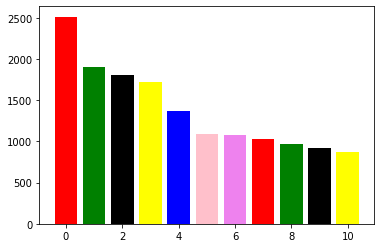

In [26]:
plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = ['red','green','black','yellow','blue','pink','violet'])

In [27]:
plt.xticks(list(range(0, 11), ), items[0:11])
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

In [28]:
plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = ['red','green','black','yellow','blue','pink','violet'])
plt.xticks(list(range(0, 11), ), items[0:11])
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

# Creating Data Frame for the transactions data#

In [29]:
groceries_series = pd.DataFrame(pd.Series(groceries_list))

In [30]:
groceries_series

0
0     [citrus fruit, semi-finished bread, margarine,...
1                      [tropical fruit, yogurt, coffee]
2                                          [whole milk]
3      [pip fruit, yogurt, cream cheese , meat spreads]
4     [other vegetables, whole milk, condensed milk,...
...                                                 ...
9831                                [cooking chocolate]
9832  [chicken, citrus fruit, other vegetables, butt...
9833  [semi-finished bread, bottled water, soda, bot...
9834  [chicken, tropical fruit, other vegetables, vi...
9835                                                 []

[9836 rows x 1 columns]

In [31]:
# Removing the Last Empty Transaction
groceries_series = groceries_series.iloc[:9835, :]

In [32]:
groceries_series

0
0     [citrus fruit, semi-finished bread, margarine,...
1                      [tropical fruit, yogurt, coffee]
2                                          [whole milk]
3      [pip fruit, yogurt, cream cheese , meat spreads]
4     [other vegetables, whole milk, condensed milk,...
...                                                 ...
9830  [sausage, chicken, beef, hamburger meat, citru...
9831                                [cooking chocolate]
9832  [chicken, citrus fruit, other vegetables, butt...
9833  [semi-finished bread, bottled water, soda, bot...
9834  [chicken, tropical fruit, other vegetables, vi...

[9835 rows x 1 columns]

In [33]:
# Columns name is added i.e. "Transactions"
groceries_series.columns = ["transactions"]

In [34]:
groceries_series

transactions
0     [citrus fruit, semi-finished bread, margarine,...
1                      [tropical fruit, yogurt, coffee]
2                                          [whole milk]
3      [pip fruit, yogurt, cream cheese , meat spreads]
4     [other vegetables, whole milk, condensed milk,...
...                                                 ...
9830  [sausage, chicken, beef, hamburger meat, citru...
9831                                [cooking chocolate]
9832  [chicken, citrus fruit, other vegetables, butt...
9833  [semi-finished bread, bottled water, soda, bot...
9834  [chicken, tropical fruit, other vegetables, vi...

[9835 rows x 1 columns]

# Creating a dummy columns for the each item in each transactions ... Using column names as item name#

Here, Dummy variables is created, that converts Categorical data into Numerical Data.

In [35]:
X = groceries_series['transactions'].str.join(sep = ',')
X = groceries_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')

In [36]:
X # Here, Binary matrix Format is Created.

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                         0         0                 0                 0   
1                         0         0                 0                 0   
2                         0         0                 0                 0   
3                         0         0                 0                 0   
4                         0         0                 0                 0   
...                     ...       ...               ...               ...   
9830                      0         0                 0                 0   
9831                      0         0                 0                 0   
9832                      0         0                 0                 0   
9833                      0         0                 0                 0   
9834                      0         0                 0                 0   

      baby cosmetics  baby food  bags  baking powder  bathroom cleaner  beef  \
0                  0          0     0              0                 0     0   
1                  0          0     0              0                 0     0   
2                  0          0     0              0                 0     0   
3                  0          0     0              0                 0     0   
4                  0          0     0              0                 0     0   
...              ...        ...   ...            ...               ...   ...   
9830               0          0     0              0                 0     1   
9831               0          0     0              0                 0     0   
9832               0          0     0              0                 0     0   
9833               0          0     0              0                 0     0   
9834               0          0     0              0                 0     0   

      ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0     ...       0        0        0                   0       0            0   
1     ...       0        0        0                   0       0            0   
2     ...       0        0        0                   0       0            0   
3     ...       0        0        0                   0       0            0   
4     ...       0        0        0                   0       0            0   
...   ...     ...      ...      ...                 ...     ...          ...   
9830  ...       0        0        0                   1       0            0   
9831  ...       0        0        0                   0       0            0   
9832  ...       0        0        0                   0       0            0   
9833  ...       0        0        0                   0       0            0   
9834  ...       0        1        0                   0       0            0   

      white wine  whole milk  yogurt  zwieback  
0              0           0       0         0  
1              0           0       1         0  
2              0           1       0         0  
3              0           0       1         0  
4              0           1       0         0  
...          ...         ...     ...       ...  
9830           0           1       0         0  
9831           0           0       0         0  
9832           0           0       1         0  
9833           0           0       0         0  
9834           0           0       0         0  

[9835 rows x 169 columns]

#Apriori Algorithm (Upto here, Data Preprocessing is done, Now actual implementation will start)#

So, here we have only control for minimum support value which is alpha value. If we decrease it, number of combinations will be decreased.

In [37]:
frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames = True)
# so by using apriori algo, minimum support is provided, also maimum length (support) is provided and it is saying that use the columns is true.

In [38]:
frequent_itemsets

support                                           itemsets
0    0.008033                            (Instant food products)
1    0.033452                                         (UHT-milk)
2    0.017692                                    (baking powder)
3    0.052466                                             (beef)
4    0.033249                                          (berries)
..        ...                                                ...
526  0.007931   (tropical fruit, whole milk, whipped/sour cream)
527  0.015150               (tropical fruit, whole milk, yogurt)
528  0.010880           (whole milk, whipped/sour cream, yogurt)
529  0.007829  (other vegetables, whole milk, yogurt, root ve...
530  0.007626  (other vegetables, tropical fruit, whole milk,...

[531 rows x 2 columns]

# Most Frequent item sets based on support #

In [39]:
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
# here, it is saying that, for frequent_itemsets sorting of the values is done
# for support in ascending order is false means it is done in descending order, inplace is true means it is a method in which
# indexes are reassigned

In [40]:
frequent_itemsets

support                           itemsets
100  0.255516                       (whole milk)
63   0.193493                 (other vegetables)
77   0.183935                       (rolls/buns)
86   0.174377                             (soda)
101  0.139502                           (yogurt)
..        ...                                ...
424  0.007524          (whole milk, soft cheese)
432  0.007524                  (waffles, yogurt)
445  0.007524  (bottled water, soda, whole milk)
230  0.007524                     (pastry, curd)
226  0.007524   (root vegetables, cream cheese )

[531 rows x 2 columns]

# Association Rules #

In [41]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
# here, association_rukes is applied for frequent_items where metric is "lift", and
# minimum threshold  = 1 means, it will take lift values more than 1, it will not take
# values of lift below 1, i.e. Threshold.
# and assigned to the rules.

In [42]:
rules.head(20) # So, it will provide all antecedent and consequents and all supports
# all lift values

antecedents         consequents  antecedent support  \
0   (other vegetables)        (whole milk)            0.193493   
1         (whole milk)  (other vegetables)            0.255516   
2         (whole milk)        (rolls/buns)            0.255516   
3         (rolls/buns)        (whole milk)            0.183935   
4         (whole milk)            (yogurt)            0.255516   
5             (yogurt)        (whole milk)            0.139502   
6         (whole milk)   (root vegetables)            0.255516   
7    (root vegetables)        (whole milk)            0.108998   
8   (other vegetables)   (root vegetables)            0.193493   
9    (root vegetables)  (other vegetables)            0.108998   
10  (other vegetables)            (yogurt)            0.193493   
11            (yogurt)  (other vegetables)            0.139502   
12  (other vegetables)        (rolls/buns)            0.193493   
13        (rolls/buns)  (other vegetables)            0.183935   
14    (tropical fruit)        (whole milk)            0.104931   
15        (whole milk)    (tropical fruit)            0.255516   
16              (soda)        (rolls/buns)            0.174377   
17        (rolls/buns)              (soda)            0.183935   
18  (other vegetables)    (tropical fruit)            0.193493   
19    (tropical fruit)  (other vegetables)            0.104931   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.255516  0.074835    0.386758  1.513634  0.025394    1.214013  
1             0.193493  0.074835    0.292877  1.513634  0.025394    1.140548  
2             0.183935  0.056634    0.221647  1.205032  0.009636    1.048452  
3             0.255516  0.056634    0.307905  1.205032  0.009636    1.075696  
4             0.139502  0.056024    0.219260  1.571735  0.020379    1.102157  
5             0.255516  0.056024    0.401603  1.571735  0.020379    1.244132  
6             0.108998  0.048907    0.191405  1.756031  0.021056    1.101913  
7             0.255516  0.048907    0.448694  1.756031  0.021056    1.350401  
8             0.108998  0.047382    0.244877  2.246605  0.026291    1.179941  
9             0.193493  0.047382    0.434701  2.246605  0.026291    1.426693  
10            0.139502  0.043416    0.224383  1.608457  0.016424    1.109436  
11            0.193493  0.043416    0.311224  1.608457  0.016424    1.170929  
12            0.183935  0.042603    0.220179  1.197047  0.007013    1.046477  
13            0.193493  0.042603    0.231620  1.197047  0.007013    1.049620  
14            0.255516  0.042298    0.403101  1.577595  0.015486    1.247252  
15            0.104931  0.042298    0.165539  1.577595  0.015486    1.072631  
16            0.183935  0.038332    0.219825  1.195124  0.006258    1.046003  
17            0.174377  0.038332    0.208402  1.195124  0.006258    1.042983  
18            0.104931  0.035892    0.185497  1.767790  0.015589    1.098913  
19            0.193493  0.035892    0.342054  1.767790  0.015589    1.225796

In [43]:
rules.sort_values('lift', ascending = False).head(10) # Here, sorting of rules is done
# on basis of 'lift' column in descending order, and taking the top 10 results
# to check the association of the products that, which products or items are
# bought by people together with strong association and that can be Done using the lift ratio.

antecedents                         consequents  \
1173        (whole milk, tropical fruit)          (other vegetables, yogurt)   
1172          (other vegetables, yogurt)        (whole milk, tropical fruit)   
1093           (yogurt, root vegetables)      (other vegetables, whole milk)   
1088      (other vegetables, whole milk)           (yogurt, root vegetables)   
792                            (berries)                (whipped/sour cream)   
793                 (whipped/sour cream)                           (berries)   
1170  (other vegetables, tropical fruit)                (whole milk, yogurt)   
1175                (whole milk, yogurt)  (other vegetables, tropical fruit)   
1052                   (root vegetables)            (other vegetables, beef)   
1049            (other vegetables, beef)                   (root vegetables)   

      antecedent support  consequent support   support  confidence      lift  \
1173            0.042298            0.043416  0.007626    0.180288  4.152546   
1172            0.043416            0.042298  0.007626    0.175644  4.152546   
1093            0.025826            0.074835  0.007829    0.303150  4.050919   
1088            0.074835            0.025826  0.007829    0.104620  4.050919   
792             0.033249            0.071683  0.009049    0.272171  3.796886   
793             0.071683            0.033249  0.009049    0.126241  3.796886   
1170            0.035892            0.056024  0.007626    0.212465  3.792358   
1175            0.056024            0.035892  0.007626    0.136116  3.792358   
1052            0.108998            0.019725  0.007931    0.072761  3.688692   
1049            0.019725            0.108998  0.007931    0.402062  3.688692   

      leverage  conviction  
1173  0.005789    1.166976  
1172  0.005789    1.161758  
1093  0.005896    1.327638  
1088  0.005896    1.088000  
792   0.006666    1.275461  
793   0.006666    1.106428  
1170  0.005615    1.198645  
1175  0.005615    1.116016  
1052  0.005781    1.057197  
1049  0.005781    1.490123

# Extra part #

## Handling Profusion of Rules (Duplication elimination) ##

1. Duplication of lift occurs, because of if we change sequence then support is not going to change but confidence will be affected.


In [44]:
# a user defined function is created which returns a sorted list, when data is passed
def to_list(i):
    return (sorted(list(i)))

In [45]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [46]:
ma_X

0          [other vegetables, whole milk]
1          [whole milk, other vegetables]
2                [whole milk, rolls/buns]
3                [rolls/buns, whole milk]
4                    [whole milk, yogurt]
                      ...                
1193    [whole milk, bottled water, soda]
1194                       [pastry, curd]
1195                       [curd, pastry]
1196     [root vegetables, cream cheese ]
1197     [cream cheese , root vegetables]
Length: 1198, dtype: object

In [47]:
ma_X = ma_X.apply(sorted) #ma_x is sorted

In [48]:
ma_X

0          [other vegetables, whole milk]
1          [other vegetables, whole milk]
2                [rolls/buns, whole milk]
3                [rolls/buns, whole milk]
4                    [whole milk, yogurt]
                      ...                
1193    [bottled water, soda, whole milk]
1194                       [curd, pastry]
1195                       [curd, pastry]
1196     [cream cheese , root vegetables]
1197     [cream cheese , root vegetables]
Length: 1198, dtype: object

In [49]:
rules_sets = list(ma_X)

In [50]:
rules_sets

[['other vegetables', 'whole milk'],
 ['other vegetables', 'whole milk'],
 ['rolls/buns', 'whole milk'],
 ['rolls/buns', 'whole milk'],
 ['whole milk', 'yogurt'],
 ['whole milk', 'yogurt'],
 ['root vegetables', 'whole milk'],
 ['root vegetables', 'whole milk'],
 ['other vegetables', 'root vegetables'],
 ['other vegetables', 'root vegetables'],
 ['other vegetables', 'yogurt'],
 ['other vegetables', 'yogurt'],
 ['other vegetables', 'rolls/buns'],
 ['other vegetables', 'rolls/buns'],
 ['tropical fruit', 'whole milk'],
 ['tropical fruit', 'whole milk'],
 ['rolls/buns', 'soda'],
 ['rolls/buns', 'soda'],
 ['other vegetables', 'tropical fruit'],
 ['other vegetables', 'tropical fruit'],
 ['rolls/buns', 'yogurt'],
 ['rolls/buns', 'yogurt'],
 ['bottled water', 'whole milk'],
 ['bottled water', 'whole milk'],
 ['pastry', 'whole milk'],
 ['pastry', 'whole milk'],
 ['whipped/sour cream', 'whole milk'],
 ['whipped/sour cream', 'whole milk'],
 ['rolls/buns', 'sausage'],
 ['rolls/buns', 'sausage'],
 [

In [51]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [52]:
unique_rules_sets

[['butter', 'citrus fruit'],
 ['rolls/buns', 'tropical fruit'],
 ['pastry', 'rolls/buns', 'whole milk'],
 ['beef', 'pork'],
 ['margarine', 'whole milk'],
 ['newspapers', 'other vegetables'],
 ['curd', 'other vegetables'],
 ['long life bakery product', 'soda'],
 ['rolls/buns', 'yogurt'],
 ['chocolate', 'soda'],
 ['frankfurter', 'pastry'],
 ['bottled water', 'rolls/buns', 'whole milk'],
 ['brown bread', 'other vegetables', 'whole milk'],
 ['domestic eggs', 'sausage'],
 ['long life bakery product', 'other vegetables'],
 ['onions', 'root vegetables'],
 ['bottled water', 'napkins'],
 ['candy', 'soda'],
 ['bottled water', 'rolls/buns'],
 ['detergent', 'whole milk'],
 ['cat food', 'whole milk'],
 ['butter milk', 'rolls/buns'],
 ['cream cheese ', 'whole milk'],
 ['sausage', 'tropical fruit'],
 ['fruit/vegetable juice', 'soda'],
 ['root vegetables', 'tropical fruit', 'yogurt'],
 ['other vegetables', 'whipped/sour cream'],
 ['citrus fruit', 'yogurt'],
 ['frozen meals', 'other vegetables'],
 ['ot

In [53]:
index_rules = []

In [54]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [55]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

In [56]:
rules_no_redudancy # redundacy means removal of the duplicated data.

antecedents     consequents  antecedent support  \
756                             (butter)  (citrus fruit)            0.055414   
66                      (tropical fruit)    (rolls/buns)            0.104931   
860                 (whole milk, pastry)    (rolls/buns)            0.033249   
1116                              (beef)          (pork)            0.052466   
76                           (margarine)    (whole milk)            0.058566   
...                                  ...             ...                 ...   
372   (other vegetables, tropical fruit)        (yogurt)            0.035892   
782                      (domestic eggs)        (pastry)            0.063447   
852                   (soda, rolls/buns)        (yogurt)            0.038332   
1054                              (curd)     (pip fruit)            0.053279   
378                            (napkins)        (yogurt)            0.052364   

      consequent support   support  confidence      lift  leverage  conviction  
756             0.082766  0.009151    0.165138  1.995244  0.004565    1.098665  
66              0.183935  0.024606    0.234496  1.274886  0.005305    1.066050  
860             0.183935  0.008541    0.256881  1.396585  0.002425    1.098162  
1116            0.057651  0.007626    0.145349  2.521174  0.004601    1.102612  
76              0.255516  0.024199    0.413194  1.617098  0.009235    1.268706  
...                  ...       ...         ...       ...       ...         ...  
372             0.139502  0.012303    0.342776  2.457146  0.007296    1.309293  
782             0.088968  0.009049    0.142628  1.603141  0.003405    1.062587  
852             0.139502  0.008643    0.225464  1.616210  0.003295    1.110986  
1054            0.075648  0.007829    0.146947  1.942499  0.003799    1.083580  
378             0.139502  0.012303    0.234951  1.684218  0.004998    1.124763  

[409 rows x 9 columns]

In [57]:
# Sorting them with respect to list and getting top 10 rules 
rules10 = rules_no_redudancy.sort_values('lift', ascending = False).head(10)

In [58]:
rules10

antecedents           consequents  \
792                                        (berries)  (whipped/sour cream)   
678               (other vegetables, tropical fruit)           (pip fruit)   
1084          (other vegetables, whole milk, yogurt)     (root vegetables)   
1166  (other vegetables, whole milk, tropical fruit)              (yogurt)   
1048             (other vegetables, root vegetables)                (beef)   
360               (other vegetables, tropical fruit)     (root vegetables)   
1004                   (whole milk, root vegetables)                (beef)   
776               (other vegetables, tropical fruit)        (citrus fruit)   
1064              (other vegetables, tropical fruit)  (whipped/sour cream)   
172                                (root vegetables)                (beef)   

      antecedent support  consequent support   support  confidence      lift  \
792             0.033249            0.071683  0.009049    0.272171  3.796886   
678             0.035892            0.075648  0.009456    0.263456  3.482649   
1084            0.022267            0.108998  0.007829    0.351598  3.225716   
1166            0.017082            0.139502  0.007626    0.446429  3.200164   
1048            0.047382            0.052466  0.007931    0.167382  3.190313   
360             0.035892            0.108998  0.012303    0.342776  3.144780   
1004            0.048907            0.052466  0.008033    0.164241  3.130449   
776             0.035892            0.082766  0.009049    0.252125  3.046248   
1064            0.035892            0.071683  0.007829    0.218130  3.042995   
172             0.108998            0.052466  0.017387    0.159515  3.040367   

      leverage  conviction  
792   0.006666    1.275461  
678   0.006741    1.254985  
1084  0.005402    1.374150  
1166  0.005243    1.554448  
1048  0.005445    1.138018  
360   0.008391    1.355705  
1004  0.005467    1.133741  
776   0.006079    1.226454  
1064  0.005256    1.187304  
172   0.011668    1.127366